In [ ]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from statsmodels.robust.scale import huber
import array as arr
from scipy.stats import cauchy
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from scipy.stats import wilcoxon
from scipy import stats
#import statistics as stats

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df0 = pd.read_csv('Book1diseased.csv')
df1 = pd.read_csv('Book1notdiseased.csv')
#stats.trim_mean(df['ind'], 0.1)
pernt = 0.05
y = arr.array('d', [ stats.trim_mean(df0['obesity'], pernt),stats.trim_mean(df1['adiposity'], pernt)])
print(y)
#df1


array('d', [25.765777777777778, 25.069777777777777])


In [ ]:
rdiseased = cauchy.rvs(loc = 25.765777777777778, scale =1, size=100)
rdiseased

In [ ]:
rnotdiseased = cauchy.rvs(loc = 25.069777777777777, scale =1, size=100)
rnotdiseased

In [ ]:
def plot_roc(y_test,probs):
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Trimm_mean_5.csv')


In [ ]:
X = data[['Trimm1', 'Trimm2']]
y = data['Outcome']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

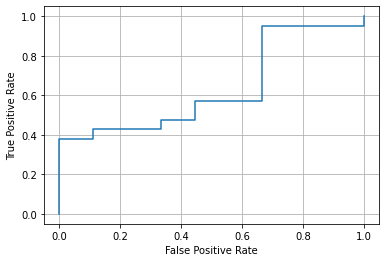

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

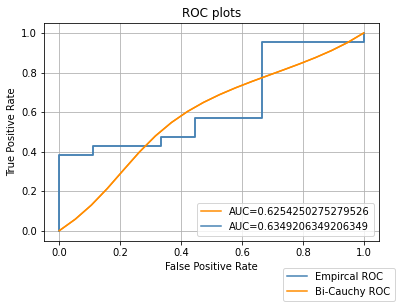

In [ ]:
#define metrics
import math
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

const = 0.588;
t = np.linspace(0,1,20)
x = np.pi*t - np.pi/2
y = const + np.tan(x)
z = 1/2 + 1/np.pi*np.arctan(y)
#auc2 = np.trapz(z,t)
auc2 = 1/2 + 1/np.pi*np.arctan(const/math.sqrt(2))


#create ROC curve
h22, = plt.plot(fpr,tpr,color = 'steelblue', label="AUC="+str(auc))
h2, =  plt.plot(fpr,tpr,color = 'steelblue', label="Empircal ROC")
plt.title("ROC plots")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.plot(tpr, np.tan(tpr))
h11, = plt.plot(t,z,color = 'darkorange',label="AUC="+str(auc2))
h1, = plt.plot(t,z,color = 'darkorange', label="Bi-Cauchy ROC")

leg = plt.legend(handles=[h11,h22], loc='lower right')
ax = plt.gca().add_artist(leg)
leg = plt.legend(handles=[h2,h1], loc=3, bbox_to_anchor=(0.7,-0.3))
plt.grid()
plt.show()
